In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read NumPy data
infile_dir = 'graph_data'
data = np.load(infile_dir + '/signal_selection_data.npz')

print("Successfully loaded data!")

Successfully loaded data!


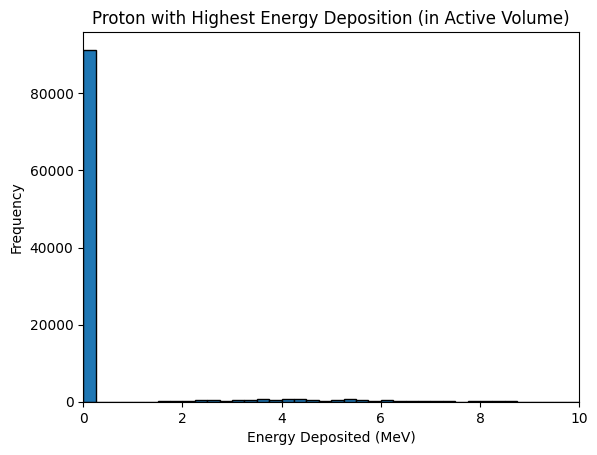

In [4]:
# Proton with highest energy deposition (in active volume)

# Define bins
bins = np.arange(0, 10.25, 0.25)
plt.hist(data['pmaxe'], bins=bins, edgecolor='black')
plt.xlim(0, 10)

# Axis labels
plt.xlabel('Energy Deposited (MeV)')
plt.ylabel('Frequency')
plt.title('Proton with Highest Energy Deposition (in Active Volume)')

plt.show()

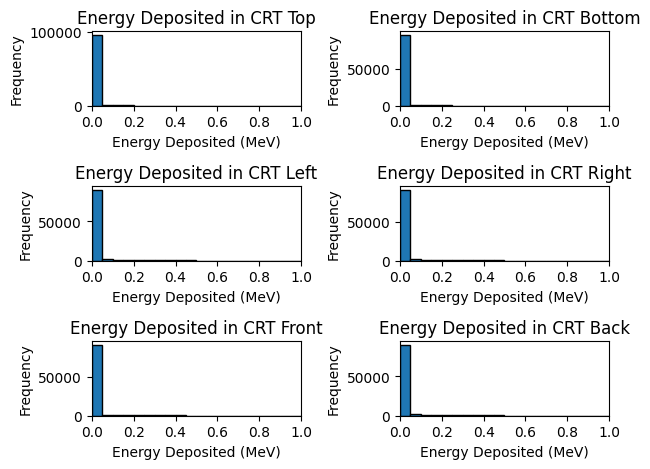

In [5]:
# Energy deposited in CRT volume per event
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

# Define bins
bins = np.arange(0, 1.05, 0.05)

# CRT top
ax1.hist(data['crttop'], bins=bins, edgecolor='black')
ax1.set_xlim(0, 1)
ax1.set_xlabel('Energy Deposited (MeV)')
ax1.set_ylabel('Frequency')
ax1.set_title('Energy Deposited in CRT Top')

# CRT bottom
ax2.hist(data['crtbottom'], bins=bins, edgecolor='black')
ax2.set_xlim(0, 1)
ax2.set_xlabel('Energy Deposited (MeV)')
ax2.set_ylabel('Frequency')
ax2.set_title('Energy Deposited in CRT Bottom')

# CRT left
ax3.hist(data['crtleft'], bins=bins, edgecolor='black')
ax3.set_xlim(0, 1)
ax3.set_xlabel('Energy Deposited (MeV)')
ax3.set_ylabel('Frequency')
ax3.set_title('Energy Deposited in CRT Left')

# CRT right
ax4.hist(data['crtright'], bins=bins, edgecolor='black')
ax4.set_xlim(0, 1)
ax4.set_xlabel('Energy Deposited (MeV)')
ax4.set_ylabel('Frequency')
ax4.set_title('Energy Deposited in CRT Right')

# CRT front
ax5.hist(data['crtfront'], bins=bins, edgecolor='black')
ax5.set_xlim(0, 1)
ax5.set_xlabel('Energy Deposited (MeV)')
ax5.set_ylabel('Frequency')
ax5.set_title('Energy Deposited in CRT Front')

# CRT back
ax6.hist(data['crtback'], bins=bins, edgecolor='black')
ax6.set_xlim(0, 1)
ax6.set_xlabel('Energy Deposited (MeV)')
ax6.set_ylabel('Frequency')
ax6.set_title('Energy Deposited in CRT Back')

plt.tight_layout()
plt.show()

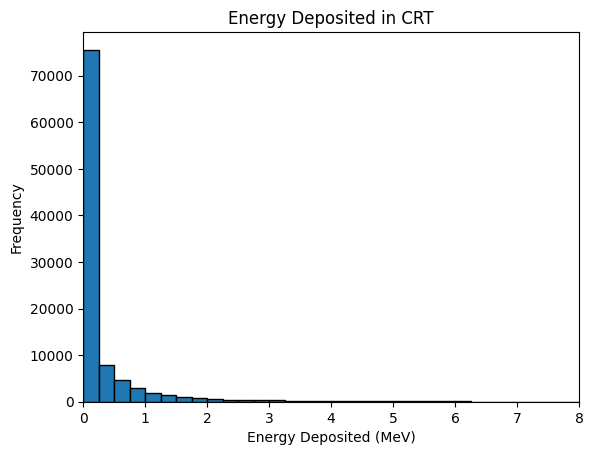

In [6]:
# Energy deposited in CRT volume per event

# Define bins
bins = np.arange(0, 8.25, 0.25)
plt.hist(data['crt'], bins=bins, edgecolor='black')
plt.xlim(0, 8)

# Axis labels
plt.xlabel('Energy Deposited (MeV)')
plt.ylabel('Frequency')
plt.title('Energy Deposited in CRT')

plt.show()

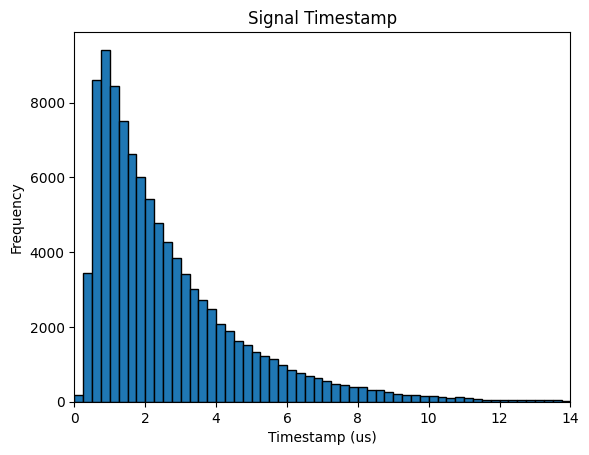

In [7]:
# tmin graph

# Define bins
bins = np.arange(0, 14.25, 0.25)
plt.hist(data['tmin'], bins=bins, edgecolor='black')
plt.xlim(0, 14)

# Axis labels
plt.xlabel('Timestamp (us)')
plt.ylabel('Frequency')
plt.title('Signal Timestamp')

plt.show()

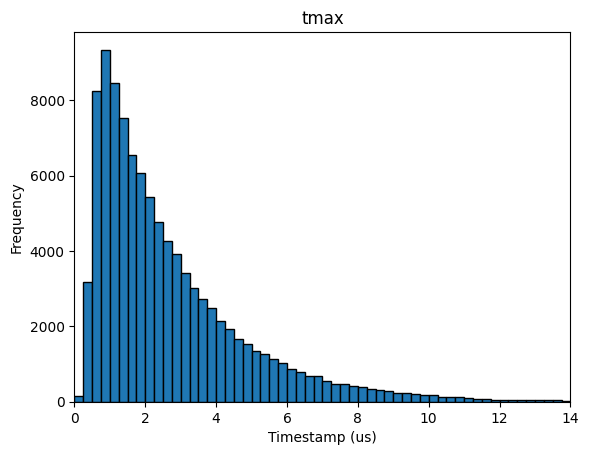

In [8]:
# tmax graph

# Define bins
bins = np.arange(0, 14.25, 0.25)
plt.hist(data['tmax'], bins=bins, edgecolor='black')
plt.xlim(0, 14)

# Axis labels
plt.xlabel('Timestamp (us)')
plt.ylabel('Frequency')
plt.title('tmax')

plt.show()

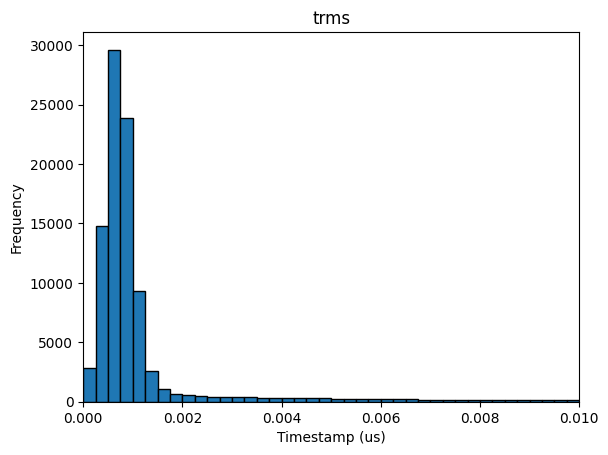

In [9]:
# trms graph

# Define bins
bins = np.arange(0, 0.010025, 0.00025)
plt.hist(data['trms'], bins=bins, edgecolor='black')
plt.xlim(0, 0.01)

# Axis labels
plt.xlabel('Timestamp (us)')
plt.ylabel('Frequency')
plt.title('trms')

plt.show()

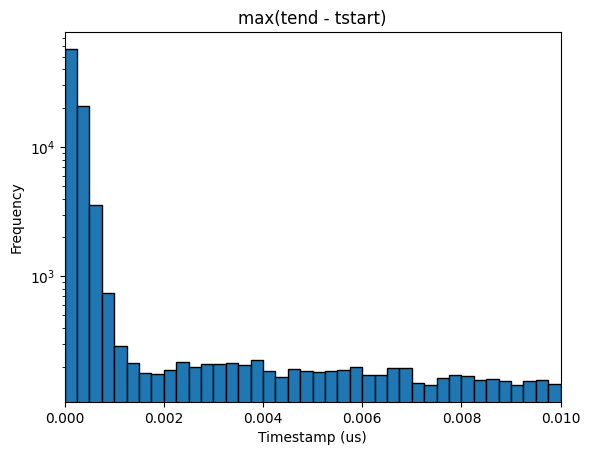

In [10]:
# tseg graph

# Define bins
bins = np.arange(0, 0.010025, 0.00025)
plt.hist(data['tseg'], bins=bins, edgecolor='black')
plt.xlim(0, 0.01)

# Axis labels
plt.yscale('log')
plt.xlabel('Timestamp (us)')
plt.ylabel('Frequency')
plt.title('max(tend - tstart)')

plt.show()

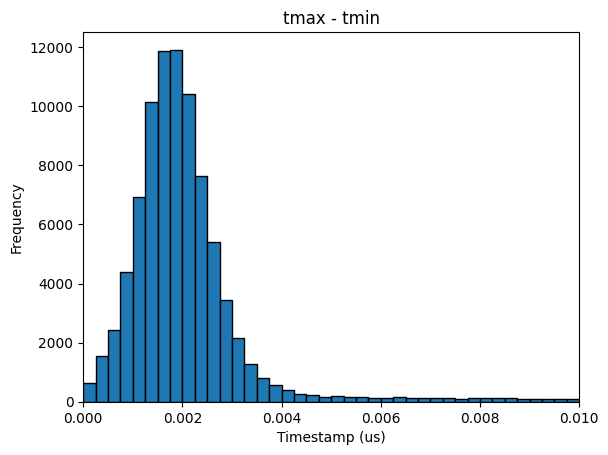

In [11]:
# tdiff graph

# Define bins
bins = np.arange(0, 0.010025, 0.00025)
plt.hist(data['tdiff'], bins=bins, edgecolor='black')
plt.xlim(0, 0.01)

# Axis labels
plt.xlabel('Timestamp (us)')
plt.ylabel('Frequency')
plt.title('tmax - tmin')

plt.show()

In [12]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter
    
class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex
        
    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)
        
    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

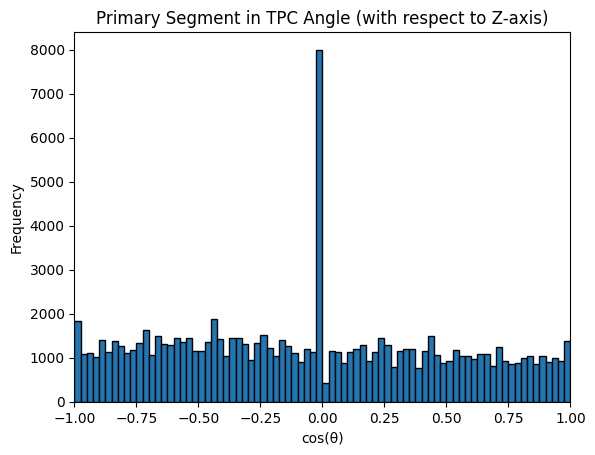

In [13]:
# θ-angle plot

# Define bins
bins = np.arange(-1, 1.025, 0.025)
plt.hist(data['theta'], bins=bins, edgecolor='black')
plt.xlim(-1, 1)

# Axis labels
plt.xlabel('cos(θ)')
plt.ylabel('Frequency')
plt.title('Primary Segment in TPC Angle (with respect to Z-axis)')

plt.show()

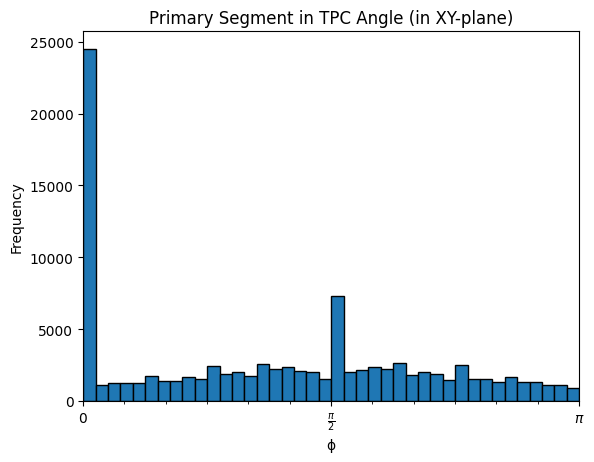

In [14]:
# ɸ-angle plot

# Define bins
bins = np.arange(0, 1.025*np.pi, 0.025*np.pi)
plt.hist(data['phi'], bins=bins, edgecolor='black')
plt.xlim(0, np.pi)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

# Axis labels
plt.xlabel('ɸ')
plt.ylabel('Frequency')
plt.title('Primary Segment in TPC Angle (in XY-plane)')

plt.show()